In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('iris.data')
df

,Sepal_Length,Sepal_width,Petal_Length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [111]:
df['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
y = LabelEncoder().fit_transform(y)

In [123]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [207]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, precision_score, recall_score, make_scorer, accuracy_score

In [208]:
    RS = RandomizedSearchCV(
    
    estimator= RandomForestClassifier(),
    
    param_distributions={
        'n_estimators': [20, 35, 40],
        'max_depth': [x for x in np.arange(2, 10, 2)],
        'max_features': ['sqrt', 'log2', 0.2],
        'min_samples_leaf': [x for x in np.arange(2, 9, 2)],
        'min_samples_split': [6, 8, 9]
        },
    
    n_iter=40,
    
    scoring= {'r2_score':make_scorer(precision_score, average='micro'),
              'recall_score':make_scorer(recall_score, average='micro'),
              'accuracy_score': make_scorer(accuracy_score),
             },
    
    refit='accuracy_score',
    cv=4,
    random_state=50,
    n_jobs=-1,
    verbose=1
)

In [209]:
RS.fit(X_test,y_test)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8],
                                        'max_features': ['sqrt', 'log2', 0.2],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [6, 8, 9],
                                        'n_estimators': [20, 35, 40]},
                   random_state=50, refit='accuracy_score',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'r2_score': make_scorer(precision_score, average=micro),
                            'recall_score': make_scorer(recall_score, average=micro)},
                   verbose=1)

In [210]:
RS.best_estimator_

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=2,
                       min_samples_split=8, n_estimators=35)

In [211]:
y_pred = RS.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

1.0

In [212]:
result = pd.DataFrame(RS.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,...,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_test_accuracy_score,split1_test_accuracy_score,split2_test_accuracy_score,split3_test_accuracy_score,mean_test_accuracy_score,std_test_accuracy_score,rank_test_accuracy_score
0,0.109724,0.003299,0.017265,0.000363,40,6,8,sqrt,2,"{'n_estimators': 40, 'min_samples_split': 6, '...",...,0.535714,0.095331,33,0.375,0.625,0.571429,0.571429,0.535714,0.095331,33
1,0.108906,0.003170,0.017530,0.000649,40,8,8,0.2,8,"{'n_estimators': 40, 'min_samples_split': 8, '...",...,0.571429,0.124361,31,0.375,0.625,0.714286,0.571429,0.571429,0.124361,31
2,0.055496,0.002186,0.013832,0.000443,20,9,6,sqrt,2,"{'n_estimators': 20, 'min_samples_split': 9, '...",...,0.758929,0.126584,26,0.875,0.875,0.714286,0.571429,0.758929,0.126584,26
3,0.103784,0.002742,0.016687,0.000216,40,9,6,log2,8,"{'n_estimators': 40, 'min_samples_split': 9, '...",...,0.825893,0.120039,25,1.000,0.875,0.714286,0.714286,0.825893,0.120039,25
4,0.055587,0.003763,0.013918,0.000282,20,9,8,log2,4,"{'n_estimators': 20, 'min_samples_split': 9, '...",...,0.500000,0.175419,38,0.625,0.375,0.714286,0.285714,0.500000,0.175419,38
5,0.090818,0.001440,0.015906,0.000384,35,6,8,sqrt,6,"{'n_estimators': 35, 'min_samples_split': 6, '...",...,0.566964,0.044419,32,0.500,0.625,0.571429,0.571429,0.566964,0.044419,32
6,0.104416,0.004318,0.016833,0.000625,40,9,6,0.2,2,"{'n_estimators': 40, 'min_samples_split': 9, '...",...,0.830357,0.067409,24,0.875,0.875,0.857143,0.714286,0.830357,0.067409,24
7,0.053428,0.001107,0.013929,0.000210,20,8,8,log2,8,"{'n_estimators': 20, 'min_samples_split': 8, '...",...,0.508929,0.143136,35,0.375,0.375,0.571429,0.714286,0.508929,0.143136,35
8,0.055629,0.002342,0.013612,0.000092,20,8,4,sqrt,8,"{'n_estimators': 20, 'min_samples_split': 8, '...",...,0.968750,0.054127,10,0.875,1.000,1.000000,1.000000,0.968750,0.054127,10
9,0.091334,0.000789,0.015751,0.000277,35,8,2,log2,4,"{'n_estimators': 35, 'min_samples_split': 8, '...",...,1.000000,0.000000,1,1.000,1.000,1.000000,1.000000,1.000000,0.000000,1


In [218]:
result.to_csv('result_table')

In [224]:
GS = GridSearchCV(
    estimator=RandomForestClassifier(),
    
    param_grid={
        'max_depth': [RS.best_params_['max_depth'], 
                      RS.best_params_['max_depth'] +1, 
                      RS.best_params_['max_depth'] +2],
        
        'max_features' : [RS.best_params_['max_features']],
        
        'min_samples_leaf': [RS.best_params_['min_samples_leaf'],
                             RS.best_params_['min_samples_leaf'] +2,
                             RS.best_params_['min_samples_leaf'] +4],
        
        'min_samples_split':[RS.best_params_['min_samples_split'],
                             RS.best_params_['min_samples_split'] +2,
                             RS.best_params_['min_samples_split'] +4],
         
        'n_estimators': [RS.best_params_['n_estimators'],
                         RS.best_params_['n_estimators'] +7,
                         RS.best_params_['n_estimators'] +14]
    }, 
     
    refit='accuracy_score',
    cv=4,
    n_jobs=-1,
    verbose=1
)
print(GS.param_grid)

{'max_depth': [4, 5, 6], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [8, 10, 12], 'n_estimators': [35, 42, 49]}


In [225]:
GS.fit(X_train, y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [35, 42, 49]},
             refit='accuracy_score', verbose=1)

In [227]:
GS.cv_results_

pd.DataFrame(GS.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099046,0.001373,0.009270,0.000134,4,log2,2,8,35,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
1,0.120605,0.005659,0.013326,0.005796,4,log2,2,8,42,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
2,0.134842,0.005637,0.011447,0.000716,4,log2,2,8,49,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
3,0.097330,0.003322,0.009183,0.000171,4,log2,2,10,35,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
4,0.112628,0.003347,0.009816,0.000188,4,log2,2,10,42,"{'max_depth': 4, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.142337,0.034266,0.014217,0.006770,6,log2,6,10,42,"{'max_depth': 6, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
77,0.152022,0.022816,0.013402,0.002870,6,log2,6,10,49,"{'max_depth': 6, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.900000,0.950000,0.037268,2
78,0.103542,0.011279,0.009154,0.000456,6,log2,6,12,35,"{'max_depth': 6, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15
79,0.136461,0.020739,0.009375,0.000521,6,log2,6,12,42,"{'max_depth': 6, 'max_features': 'log2', 'min_...",0.966667,1.0,0.933333,0.866667,0.941667,0.049301,15


In [228]:
GS.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=2,
                       min_samples_split=12, n_estimators=42)

In [229]:
grid = GS.best_estimator_

In [231]:
y_pred = grid.predict(X_test)
y_pred

array([1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 2, 2, 2, 1, 1, 1, 0])

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_7578/719381346.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test, y=y_pred, data=df.iloc[120:, :4], palette='coolwarm')


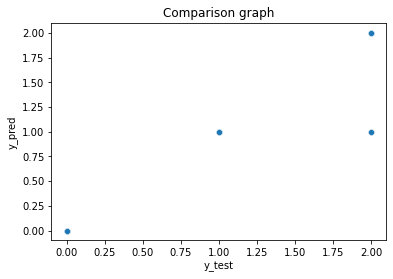

In [243]:
sns.scatterplot(x=y_test, y=y_pred, data=df.iloc[120:, :4], palette='coolwarm')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.title('Comparison graph')
plt.show()

In [256]:
data=df.iloc[120:, :4]
data['Class'] = y_pred
data.head(10)

,Sepal_Length,Sepal_width,Petal_Length,Petal_width,Class
120,6.9,3.2,5.7,2.3,1
121,5.6,2.8,4.9,2.0,2
122,7.7,2.8,6.7,2.0,1
123,6.3,2.7,4.9,1.8,1
124,6.7,3.3,5.7,2.1,1
125,7.2,3.2,6.0,1.8,0
126,6.2,2.8,4.8,1.8,1
127,6.1,3.0,4.9,1.8,1
128,6.4,2.8,5.6,2.1,0
129,7.2,3.0,5.8,1.6,0


In [260]:
data.count()

Sepal_Length    30
Sepal_width     30
Petal_Length    30
Petal_width     30
Class           30
dtype: int64